In [95]:
# Extracted data from SQL workspace and downloaded the results to a CSV file.
# Here are the data queries

# This contains the average global temperatures by year.
SELECT * 
FROM global_data;

# This contains the average temperatures for each city by year.
SELECT * 
FROM city_list
WHERE city = 'San Jose';

# This contains a list of cities and countries in the database. So extracted my neaest city 'San Jose' from the data.
FROM city_data
WHERE city = 'San Jose';


# importing pandas and numpy 
import pandas as pd
from pandas import Series
import numpy as np

In [96]:
# Reading global data from csv file.
globe_data = pd.read_csv('results.csv', sep = ',')

print (globe_data)


     year  avg_temp
0    1750      8.72
1    1751      7.98
2    1752      5.78
3    1753      8.39
4    1754      8.47
..    ...       ...
261  2011      9.52
262  2012      9.51
263  2013      9.61
264  2014      9.57
265  2015      9.83

[266 rows x 2 columns]


In [98]:
# reading city data from csv file.

city_data = pd.read_csv('results (3).csv', sep = ',')
print (city_data)

     year      city        country  avg_temp
0    1849  San Jose  United States     14.12
1    1850  San Jose  United States     13.80
2    1851  San Jose  United States     14.39
3    1852  San Jose  United States     13.81
4    1853  San Jose  United States     14.40
..    ...       ...            ...       ...
160  2009  San Jose  United States     15.02
161  2010  San Jose  United States     14.67
162  2011  San Jose  United States     14.50
163  2012  San Jose  United States     15.05
164  2013  San Jose  United States     16.23

[165 rows x 4 columns]


In [99]:
globe_data.head()

,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47


In [100]:
city_data.head()

,year,city,country,avg_temp
0,1849,San Jose,United States,14.12
1,1850,San Jose,United States,13.80
2,1851,San Jose,United States,14.39
3,1852,San Jose,United States,13.81
4,1853,San Jose,United States,14.40


In [101]:
globe_data.index

RangeIndex(start=0, stop=266, step=1)

In [102]:
city_data.index

RangeIndex(start=0, stop=165, step=1)

In [103]:
# filtering data. delecting country from city data.

my_city_data = city_data.drop('country', axis = 1)
my_city_data

# renaming the columns.
my_city_data.rename({'year': 'city_year', 'avg_temp': 'city_avg_temp'}, axis=1, inplace=True)
my_city_data

,city_year,city,city_avg_temp
0,1849,San Jose,14.12
1,1850,San Jose,13.80
2,1851,San Jose,14.39
3,1852,San Jose,13.81
4,1853,San Jose,14.40
...,...,...,...
160,2009,San Jose,15.02
161,2010,San Jose,14.67
162,2011,San Jose,14.50
163,2012,San Jose,15.05


In [104]:
# renaming the global columns.

globe_data.rename({ 'avg_temp': 'world_avg_temp'}, axis=1, inplace=True)
globe_data

,year,world_avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47
...,...,...
261,2011,9.52
262,2012,9.51
263,2013,9.61
264,2014,9.57


In [105]:
# deleting all rows from [1-98] in global data to match city data.

world_data = globe_data.drop(range(0,99), axis = 0)
world_data

world_data = world_data.drop([264,265], axis = 0)
world_data

,year,world_avg_temp
99,1849,7.98
100,1850,7.90
101,1851,8.18
102,1852,8.10
103,1853,8.04
...,...,...
259,2009,9.51
260,2010,9.70
261,2011,9.52
262,2012,9.51


In [106]:
# chaning global data's index number.

data = world_data.rename(index = lambda x: x - 99) 
data 


,year,world_avg_temp
0,1849,7.98
1,1850,7.90
2,1851,8.18
3,1852,8.10
4,1853,8.04
...,...,...
160,2009,9.51
161,2010,9.70
162,2011,9.52
163,2012,9.51


In [107]:
# merging both city and global data.

temp = pd.concat([my_city_data, data], axis = 1)
temp

,city_year,city,city_avg_temp,year,world_avg_temp
0,1849,San Jose,14.12,1849,7.98
1,1850,San Jose,13.80,1850,7.90
2,1851,San Jose,14.39,1851,8.18
3,1852,San Jose,13.81,1852,8.10
4,1853,San Jose,14.40,1853,8.04
...,...,...,...,...,...
160,2009,San Jose,15.02,2009,9.51
161,2010,San Jose,14.67,2010,9.70
162,2011,San Jose,14.50,2011,9.52
163,2012,San Jose,15.05,2012,9.51


In [108]:
# delecting year and city from city data.

temp = temp.drop(['city_year', 'city'], axis = 1)
temp

,city_avg_temp,year,world_avg_temp
0,14.12,1849,7.98
1,13.80,1850,7.90
2,14.39,1851,8.18
3,13.81,1852,8.10
4,14.40,1853,8.04
...,...,...,...
160,15.02,2009,9.51
161,14.67,2010,9.70
162,14.50,2011,9.52
163,15.05,2012,9.51


In [109]:
# These are the plotting modules
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

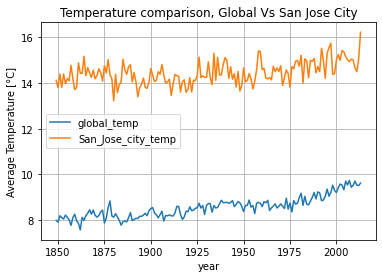

In [112]:
# plotting line chart local v/s global

plt.title("Temperature comparison, Global Vs San Jose City") 
plt.xlabel("year") 
plt.ylabel("Average Temperature [°C]") 
plt.plot('year','world_avg_temp', data =temp)
plt.plot('year','city_avg_temp', data =temp)
plt.legend(['global_temp', 'San_Jose_city_temp'], loc=6) 
plt.grid(True)


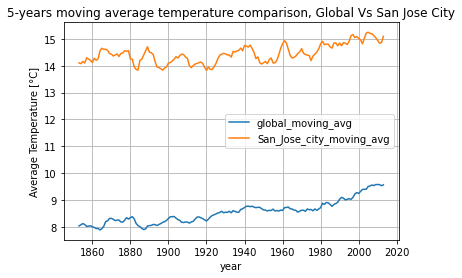

In [113]:
# calculating moving average for 5 years.
temp['city_moving_avg'] = temp['city_avg_temp'].rolling(window=5).mean()
temp['world_moving_avg'] = temp['world_avg_temp'].rolling(window=5).mean()

temp

# plotting moving avg chart for 5 years.
plt.title("5-years moving average temperature comparison, Global Vs San Jose City") 
plt.xlabel("year") 
plt.ylabel("Average Temperature [°C]") 
plt.plot('year','world_moving_avg', data =temp)
plt.plot('year','city_moving_avg', data =temp)
plt.legend(['global_moving_avg', 'San_Jose_city_moving_avg'], loc=7) 
plt.grid(True)


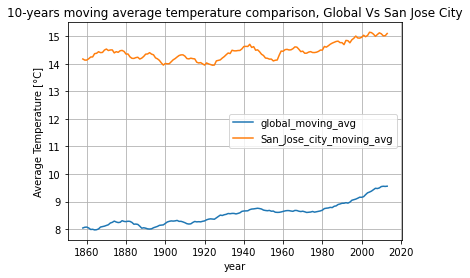

In [114]:
# calculating moving average for 10 years.
temp['city_moving_avg'] = temp['city_avg_temp'].rolling(window=10).mean()
temp['world_moving_avg'] = temp['world_avg_temp'].rolling(window=10).mean()

temp

# plotting moving avg chart for 10 years.
plt.title("10-years moving average temperature comparison, Global Vs San Jose City") 
plt.xlabel("year") 
plt.ylabel("Average Temperature [°C]") 
plt.plot('year','world_moving_avg', data =temp)
plt.plot('year','city_moving_avg', data =temp)
plt.legend(['global_moving_avg', 'San_Jose_city_moving_avg'], loc=7) 
plt.grid(True)

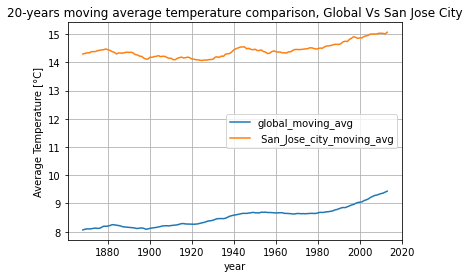

In [115]:
# calculating moving average for 20 years.
# Rolling.mean() used to calculate moving average to smooth the chart line.

temp['city_moving_avg'] = temp['city_avg_temp'].rolling(window=20).mean()
temp['world_moving_avg'] = temp['world_avg_temp'].rolling(window=20).mean()
temp


# plotting moving avg chart for 20 years.

plt.title("20-years moving average temperature comparison, Global Vs San Jose City") 
plt.xlabel("year") 
plt.ylabel("Average Temperature [°C]") 
plt.plot('year','world_moving_avg', data =temp)
plt.plot('year','city_moving_avg', data =temp)
plt.legend(['global_moving_avg', ' San_Jose_city_moving_avg'], loc=7) 
plt.grid(True)

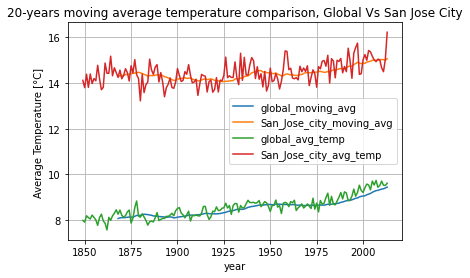

In [116]:
# plotting moving avg chart for 20 years.

plt.title("20-years moving average temperature comparison, Global Vs San Jose City") 
plt.xlabel("year") 
plt.ylabel("Average Temperature [°C] ") 
plt.plot('year','world_moving_avg', data =temp)
plt.plot('year','city_moving_avg', data =temp)
plt.plot('year','world_avg_temp', data =temp)
plt.plot('year','city_avg_temp', data =temp)
plt.legend(['global_moving_avg', 'San_Jose_city_moving_avg', 'global_avg_temp', 'San_Jose_city_avg_temp'], loc=7) 
plt.grid(True)

In [117]:

# Observations:

# 1. The global temperature has been in the range of 8 °C and 10 °C in the time period 1849 - 2013. 
#    Whereas San Jose City temperature has been hotter, in the range of 14 °C and 16 °C at the same time period.

# 2. San Jose city recored its lowest average temperature of 13.2 °C in 1860 and 16.2 °C as highest avg temperature in year 2013.

# 3. The lowest global average temperature of 7.5 °C was recorded in the year 1862 and the highest global average temperature of 9.7 °C was recorded in the year 2007. 

# 4. The difference between global and San Jose average temperatures looks to be steadily decreasing (from 6.3 °C to 5.7 °C) from 1870 up till 1930 as San Jose was getting slightly colder and earth was slightly getting warmer.

# 5. In the last 2 years (2011 - 2013) San Jose city temperature seem to be increasing at a much higher rate (0.85 °C per year) 
#    where as the global average temperature was almost constant.

# 6. The overall trend looks like the world is getting hotter, throughout the time period